In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from IPython.display import Audio



In [2]:
sample_rate = 44100
duration = 5
frequency = 440
amplitude_peep = 0.5
amplitude_noise = 0.2
sample_rate = 44100
duration = 5
frequency = 440
amplitude_peep = 0.5
amplitude_noise = 0.2


In [3]:
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
peep = amplitude_peep * np.sin(2 * np.pi * frequency * t)
noise = amplitude_noise * np.random.normal(0, 1, len(t))
signal = peep + noise


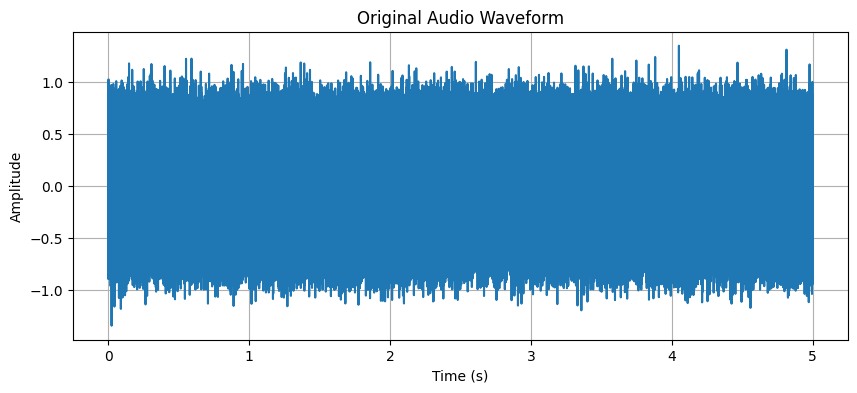

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Audio(signal, rate=sample_rate)


In [5]:
signal_normalized = signal / np.max(np.abs(signal))
write('white_noise.wav', sample_rate, np.int16(signal_normalized * 32767))
signal_normalized = signal / np.max(np.abs(signal))
write('white_noise.wav', sample_rate, np.int16(signal_normalized * 32767))


In [6]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
threshold = 0.3 * np.max(magnitude)
mask = magnitude >= threshold


In [7]:
filtered_fft = fft.copy()
filtered_fft[~mask] = 0
filtered_signal = np.fft.ifft(filtered_fft).real
filtered_fft = fft.copy()
filtered_fft[~mask] = 0
filtered_signal = np.fft.ifft(filtered_fft).real


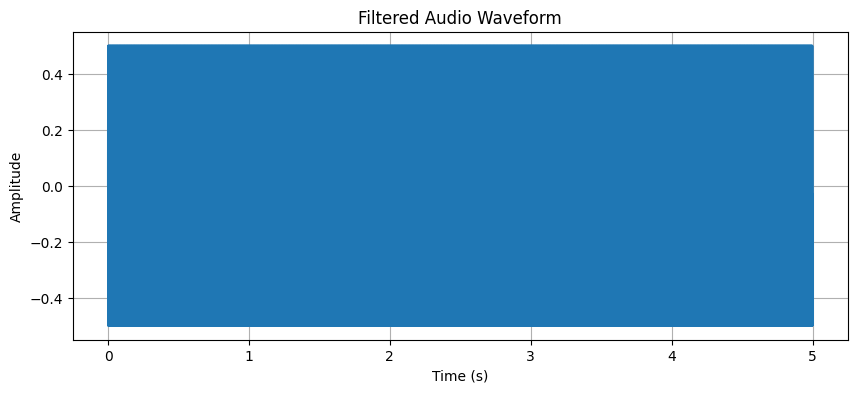

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title('Filtered Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Audio(filtered_signal, rate=sample_rate)


In [9]:
filtered_normalized = filtered_signal / np.max(np.abs(filtered_signal))
write('filtered_audio.wav', sample_rate, np.int16(filtered_normalized * 32767))
filtered_normalized = filtered_signal / np.max(np.abs(filtered_signal))
write('filtered_audio.wav', sample_rate, np.int16(filtered_normalized * 32767))
